In [5]:
%load_ext autoreload
%autoreload 2}
import os
os.environ["TERRA_CONFIG_PATH"] = "/home/sabri/code/spr-21/terra_config.json"

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [6]:
from spr.data.iwildcam import get_iwildcam_model, build_iwildcam_df, iwildcam_task_config
from spr.vision import Classifier
from robustnessgym import Dataset

model = Classifier(
    config={"model_name": "iwildcam",**iwildcam_task_config}
)


data_df = build_iwildcam_df.out(load=True)
data_df = data_df[data_df.split == "id_valid"]

/home/common/envs/conda/envs/rg-sabri/lib/python3.8/site-packages/torchmetrics/utilities/prints.py:36: UserWarning: Metric `AUROC` will save all targets and predictions in buffer. For large datasets this may lead to large memory footprint.
  warnings.warn(*args, **kwargs)


In [6]:
from spr.bss import SourceSeparator
from spr.vision import fit_bss
separator = fit_bss(
    data_df=data_df.sample(1000), #build_iwildcam_df.out(),
    model=model, 
    config={"num_classes": 182, "class_idx": 178, "activation_dim": 2048},
    split="id_valid",
    **iwildcam_task_config
)

[2021-04-26 01:10:08,587][WARNING][pip._internal.operations.freeze:72] :: Could not generate requirement for distribution -illow 8.2.0 (/home/common/envs/conda/envs/rg-sabri/lib/python3.8/site-packages): Parse error at "'-illow=='": Expected W:(abcd...)
task: fit_bss, run_id=66
Global seed set to 123
[2021-04-26 01:10:10,988][INFO][lightning:54] :: Global seed set to 123
Classifier(
  (model): ResNet(
    (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), pad

In [7]:
from spr.vision import compute_bss
from spr.vision import fit_bss

df = data_df.sample(1000)
separator = fit_bss.out(201)
components, outs, targets = compute_bss(
    separator=separator,
    data_df=df,
    split="id_valid",
    **iwildcam_task_config
)

[2021-04-27 17:53:31,776][WARNING][pip._internal.operations.freeze:72] :: Could not generate requirement for distribution -illow 8.2.0 (/home/common/envs/conda/envs/rg-sabri/lib/python3.8/site-packages): Parse error at "'-illow=='": Expected W:(abcd...)
task: compute_bss, run_id=202
/home/common/envs/conda/envs/rg-sabri/lib/python3.8/site-packages/torchmetrics/utilities/prints.py:36: UserWarning: Metric `AUROC` will save all targets and predictions in buffer. For large datasets this may lead to large memory footprint.
  warnings.warn(*args, **kwargs)
Global seed set to 123
[2021-04-27 17:53:34,224][INFO][lightning:54] :: Global seed set to 123


[2021-04-27 17:55:46,844][WARNING][pip._internal.operations.freeze:72] :: Could not generate requirement for distribution -illow 8.2.0 (/home/common/envs/conda/envs/rg-sabri/lib/python3.8/site-packages): Parse error at "'-illow=='": Expected W:(abcd...)
task: visualize_component, run_id=204


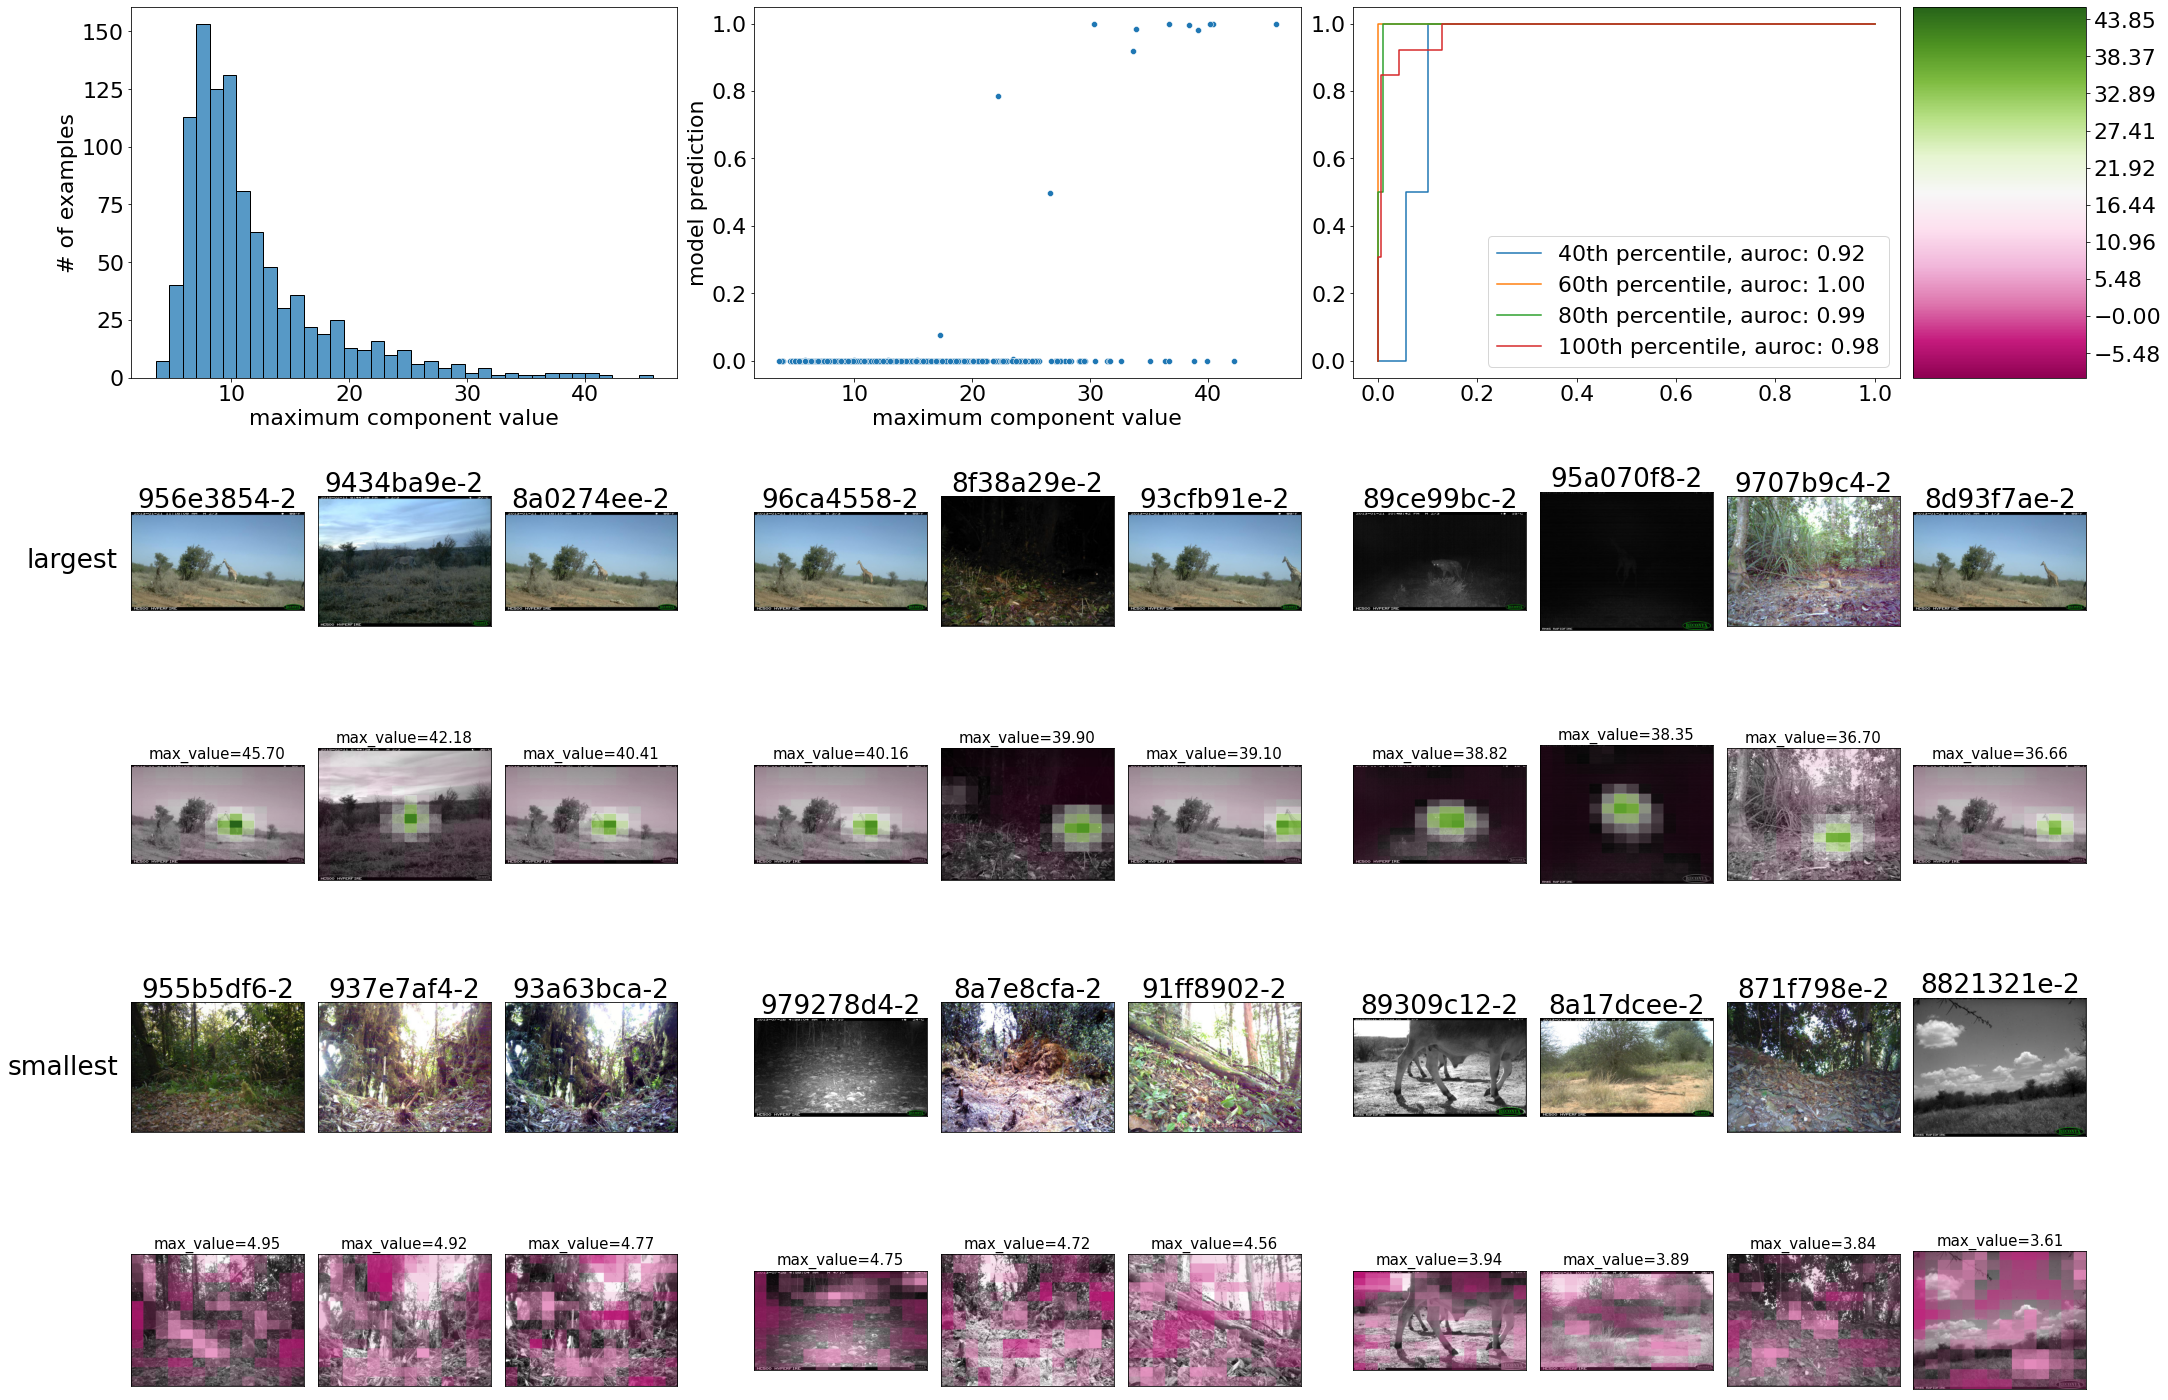

In [9]:
from spr.vis import visualize_component
from spr.vision import compute_bss

components, outs, targets = compute_bss.out(run_id=202)
visualize_component(
    data_df=df,
    components=components, 
    preds = outs, 
    targets=targets,
    split="id_valid",
    comp_idx=0,
    flip=False,
    **iwildcam_task_config
)

In [7]:
import terra
terra.get_run_dir(192)

'/home/sabri/terra/slice/tasks/vis/visualize_component/_runs/192'

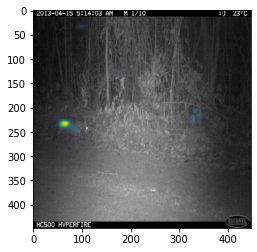

In [4]:
from spr.vis import get_saliency

dataset = Dataset.load_image_dataset(
    data_df.to_dict("records"),
    img_columns=iwildcam_task_config["img_column"],
    transform=iwildcam_task_config["img_transform"],
)
get_saliency(
    classifier, inp=dataset[0]["img_path"], show=True, device=0, threshold=0.3
);

In [41]:
fit_bs

y
0      2955
1        20
2       160
3         1
4        60
       ... 
155      30
156      10
165       1
177      10
178     140
Length: 71, dtype: int64

In [1]:
data_df

NameError: name 'data_df' is not defined